### Regresi adalah metode pendekatan untuk menentukan suatu nilai berdasarkan pengaruh antar variabel dalam bentuk x dan y. Imputasi regresi memprediksi suatu nilai berdasarkan nilai pada kolom yang ada.

## IMPORT LIBRARY DAN DATASET

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sheet_id = "14iXZbRxRT-g5GLZKR0DG4afbHF165VTR88II8X-zYl8"
sheet_name = "Data-IOT-Regresi"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

##REVIEW DATASET

In [ ]:
df = pd.read_csv(url)
df

,tanggal,datakecepatanangin,datasuhuudara,datakelembabanudara,dataphtanah,datakelembabantanah,datasuhutanah,hargabrebes
0,12/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,30000
1,12/2/2022,NaN,NaN,NaN,NaN,NaN,NaN,30000
2,12/3/2022,NaN,NaN,NaN,NaN,NaN,NaN,31000
3,12/4/2022,NaN,NaN,NaN,NaN,NaN,NaN,31000
4,12/5/2022,NaN,NaN,NaN,NaN,NaN,NaN,31000
...,...,...,...,...,...,...,...,...
85,2/24/2023,NaN,NaN,NaN,NaN,NaN,NaN,35833
86,2/25/2023,NaN,NaN,NaN,NaN,NaN,NaN,35833
87,2/26/2023,NaN,NaN,NaN,NaN,NaN,NaN,35833
88,2/27/2023,NaN,NaN,NaN,NaN,NaN,NaN,37666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tanggal              90 non-null     object 
 1   datakecepatanangin   55 non-null     float64
 2   datasuhuudara        55 non-null     float64
 3   datakelembabanudara  55 non-null     float64
 4   dataphtanah          55 non-null     float64
 5   datakelembabantanah  55 non-null     float64
 6   datasuhutanah        55 non-null     float64
 7   hargabrebes          90 non-null     int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 5.8+ KB


##COPY DATASET DAN TRANSFORMASI DTYPE TANGGAL

In [ ]:
df_fix = df.copy()
df_fix["tanggal"] = pd.to_datetime(df_fix["tanggal"], format='%m/%d/%Y')

In [ ]:
df_fix = df_fix.set_index('tanggal')

## IMPORT LIBRARY REGRESI

In [ ]:
import missingno as mno
from sklearn import linear_model
%matplotlib inline

In [ ]:
df_fix.describe()

,datakecepatanangin,datasuhuudara,datakelembabanudara,dataphtanah,datakelembabantanah,datasuhutanah,hargabrebes
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,90.000000
mean,17.605455,27.165455,86.005455,5.083636,50.952727,23.058182,35269.100000
std,6.227877,4.331334,10.827424,1.170591,14.849290,7.643484,4898.803732
min,2.800000,21.000000,71.500000,3.000000,23.400000,7.400000,28000.000000
25%,14.700000,22.000000,76.400000,4.500000,41.600000,12.600000,31000.000000
50%,15.400000,27.500000,83.200000,4.900000,47.200000,27.000000,34541.000000
75%,24.900000,32.100000,96.900000,5.000000,62.200000,29.100000,39333.000000
max,29.200000,33.000000,122.000000,8.100000,123.000000,30.900000,46000.000000


## MENGISI DATA KOSONG DENGAN NAN

In [ ]:
df.loc[df["datakecepatanangin"] == 0.0, "datakecepatanangin"] = np.NAN
df.loc[df["datasuhuudara"] == 0.0, "datasuhuudara"] = np.NAN
df.loc[df["datakelembabanudara"] == 0.0, "datakelembabanudara"] = np.NAN
df.loc[df["dataphtanah"] == 0.0, "dataphtanah"] = np.NAN
df.loc[df["datakelembabantanah"] == 0.0, "datakelembabantanah"] = np.NAN
df.loc[df["datasuhutanah"] == 0.0, "datasuhutanah"] = np.NAN

df.isnull().sum()[1:6]

datakecepatanangin     35
datasuhuudara          35
datakelembabanudara    35
dataphtanah            35
datakelembabantanah    35
dtype: int64

## CEK LOKASI MISSING VALUE

<Axes: >

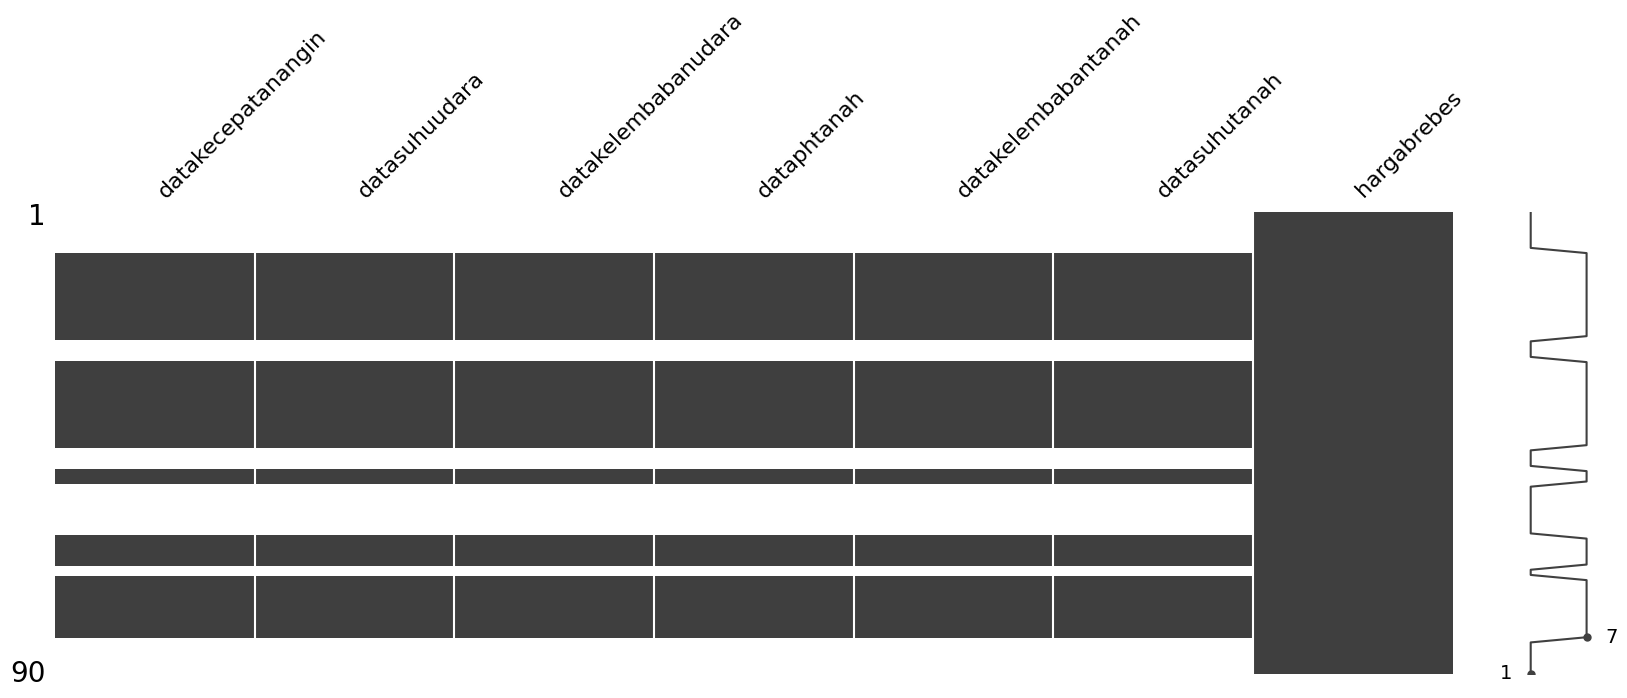

In [ ]:
mno.matrix(df_fix, figsize = (20, 6))

##BUAT ARRAY UNTUK KOLOM YANG TERDAPAT MISSING VALUE

In [ ]:
missing_columns = ['datakecepatanangin', 'datasuhuudara', 'datakelembabanudara', 'dataphtanah', 'datakelembabantanah', 'datasuhutanah']

##BUAT FUNGSI RANDOM IMPUTASI

In [ ]:
def random_imputation(df_fix, feature):

    number_missing = df_fix[feature].isnull().sum()
    observed_values = df_fix.loc[df_fix[feature].notnull(), feature]
    df_fix.loc[df_fix[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df_fix

In [ ]:
for feature in missing_columns:
    df_fix[feature + '_imp'] = df_fix[feature]
    df_fix = random_imputation(df_fix, feature)

##MEMBUAT MODEL REGRESI UNTUK IMPUTASI DATA

In [ ]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:

    deter_data["Det" + feature] = df_fix[feature + "_imp"]
    parameters = list(set(df_fix.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df_fix[parameters], y = df_fix[feature + '_imp'])

    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df_fix[feature].isnull(), "Det" + feature] = model.predict(df_fix[parameters])[df_fix[feature].isnull()]

##MELIHAT NILAI INTERCEPT DAN SLOPE UNTUK PERSAMAAN REGRESI

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 0.04871802464740734
Intercept: 2.7439265988840056


##CEK MISSING VALUE

<Axes: >

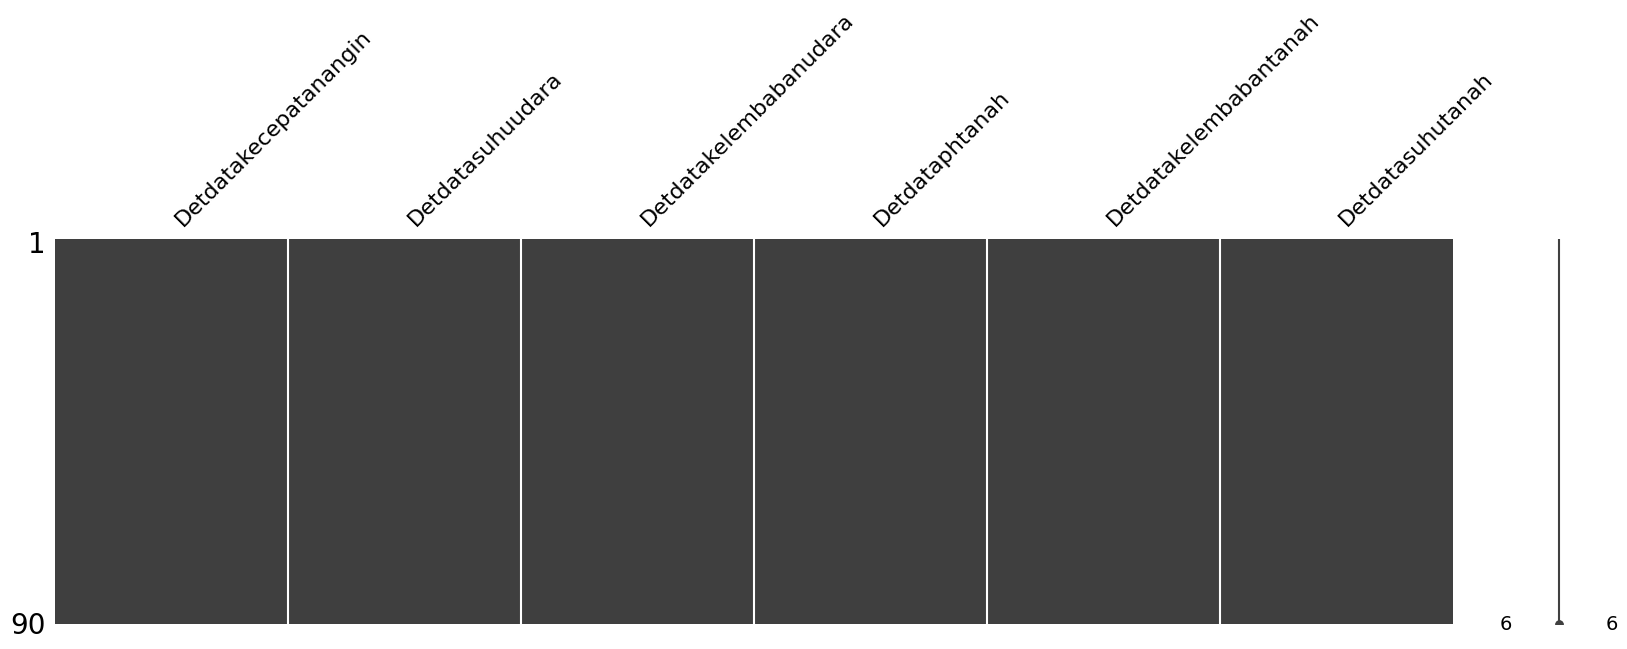

In [ ]:
mno.matrix(deter_data, figsize = (20,5))

##REVIEW DATASET

In [ ]:
deter_data['Detdatakecepatanangin'][0:30]

tanggal
2022-12-01    18.740120
2022-12-02    21.406682
2022-12-03    13.879146
2022-12-04    15.854731
2022-12-05    16.782835
2022-12-06    22.233646
2022-12-07    15.759415
2022-12-08    15.361581
2022-12-09    15.200000
2022-12-10    15.400000
2022-12-11    14.700000
2022-12-12    15.600000
2022-12-13    14.900000
2022-12-14    15.000000
2022-12-15    15.300000
2022-12-16    15.100000
2022-12-17    14.700000
2022-12-18    15.500000
2022-12-19    14.300000
2022-12-20    14.900000
2022-12-21    15.000000
2022-12-22    15.300000
2022-12-23    15.600000
2022-12-24    15.400000
2022-12-25    15.000000
2022-12-26    15.978517
2022-12-27    15.746709
2022-12-28    14.059010
2022-12-29    16.323898
2022-12-30    22.000000
Name: Detdatakecepatanangin, dtype: float64

## MEMBUAT DATASET BARU DARI HASIL IMPUTASI

In [ ]:
deter_data['hargabrebes'] = df_fix['hargabrebes ']
deter_data.reset_index()

,tanggal,Detdatakecepatanangin,Detdatasuhuudara,Detdatakelembabanudara,Detdataphtanah,Detdatakelembabantanah,Detdatasuhutanah,hargabrebes
0,2022-12-01,18.740120,22.745940,93.692387,4.871289,58.141508,18.271003,30000
1,2022-12-02,21.406682,26.284144,87.028115,6.305081,36.399551,23.351729,30000
2,2022-12-03,13.879146,29.816451,83.335158,6.731456,57.886406,24.578336,31000
3,2022-12-04,15.854731,30.339540,85.871815,5.189016,62.725977,20.008621,31000
4,2022-12-05,16.782835,28.044021,84.717733,5.116879,60.516982,19.468904,31000
...,...,...,...,...,...,...,...,...
85,2023-02-24,14.970991,24.652207,88.908593,4.770953,57.498745,18.568794,35833
86,2023-02-25,15.865973,26.511311,90.509983,4.429203,52.948302,21.443437,35833
87,2023-02-26,16.125598,29.740513,78.875692,3.785480,48.219137,30.440813,35833
88,2023-02-27,18.627337,27.773083,87.717134,5.139772,53.000245,23.266161,37666


##DOWNLOAD HASIL DALAM BENTUK EXCEL

In [ ]:
#download file excel
deter_data.to_excel("iot_brebes_regresi.xlsx", index=True)

#library untuk download file
from google.colab import files
files.download("iot_brebes_regresi.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>